<a target="_blank" href="https://colab.research.google.com/github/ClaudioSalvatoreArcidiacono/felimination/blob/main/docs/tutorials/genetic_algorithms_x_feature_selection.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Genetic Algorithms x Feature Selection

This tutorial will show an example of how we can use genetic algorithms applied to feature selection to improve our model performances.

More specifically, this tutorial will illustrate how to perform feature selection using genetic algorithm as implemented in the class [`felimination.ga.HybridImportanceGACVFeatureSelector`](https://claudiosalvatorearcidiacono.github.io/felimination/reference/genetic_algorithms/#felimination.ga.HybridImportanceGACVFeatureSelector)

In [ ]:
# Install felimination
! pip install felimination

## Create a dummy Dataset

For this tutorial we will use a dummy classification dataset created using `sklearn.datasets.make_classification`.
For this dataset we will have `6` predictive features, `10` redundant and `184` random features.

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=200,
    n_informative=6,
    n_redundant=10,
    n_clusters_per_class=1,
    random_state=42,
    shuffle=False
)

## Evaluate performances without feature elimination

In [3]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression


# Define a simple logistic regression model
model = LogisticRegression(random_state=42)

# Perform cross-validation
cv_results = cross_validate(
    model,
    X,
    y,
    cv=StratifiedKFold(random_state=42, shuffle=True),
    scoring="roc_auc",
    return_train_score=True,
)

cv_results["test_score"].mean()

0.8561362716271628

## Perform now feature elimination

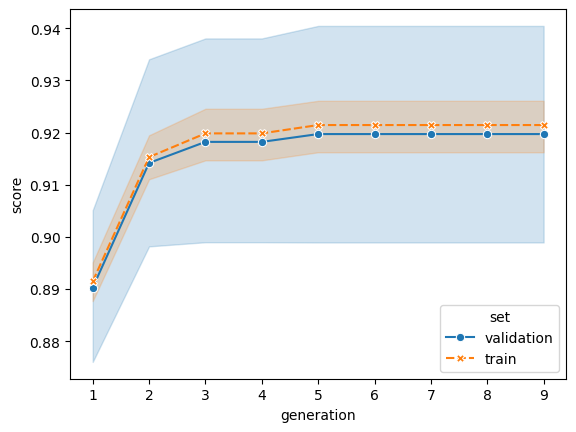

HybridImportanceGACVFeatureSelector(callbacks=[<function plot_progress_callback at 0x31aaa4fe0>],
                                    cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                    estimator=LogisticRegression(random_state=42),
                                    init_avg_features_num=5,
                                    min_features_to_select=3,
                                    n_children_cross_over=20, n_mutations=20,
                                    random_state=42, scoring='roc_auc')

In [4]:
from felimination.ga import HybridImportanceGACVFeatureSelector
from felimination.callbacks import plot_progress_callback


selector = HybridImportanceGACVFeatureSelector(
    model,
    callbacks=[plot_progress_callback],
    scoring="roc_auc",
    cv=StratifiedKFold(random_state=42, shuffle=True),
    init_avg_features_num=5,
    min_features_to_select=3,
    pool_size=20,
    n_children_cross_over=20,
    n_mutations=20,
    random_state=42,
)
selector.fit(X, y)

Notice how model performances increase with the progressive elimination of features.

This is due to the fact that models with a lot of not predictive feature tend to find patterns even in random noise and end up overfitting, see how the train score and the validation score get closer with the progressive elimination of features.

In [5]:
sorted(selector.best_solution_['features'])

[6, 10, 82, 93, 168]

The features with index <= 15 are relevant, the others are random noise. We see that some of the relevant features are being selected. Nevertheless we got a good improvement in AUC score:

In [6]:
selector.best_solution_['mean_test_score']

0.9197176917691768

The best AUC score obtained with feature elimination is now 0.92, that's ~0.06 AUC points obtained from removing useless features.

In [8]:
selector.transform(X).shape

(1000, 5)